### NetworkX (In progress)

a rapid thematic analysis of a small corpus. For more information. We start by word coulds of each chaspters and then we aim to use graph presentation of data.



 


## Imports

In [160]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf  # conda install -c conda-forge tensorflow 
import tensorflow_hub as hub  #-c conda-forge tensorflow-hub
from sklearn import preprocessing 

#!python -m spacy download en_core_web_md #you will need to install this on first load
import spacy
from spacy.lang.en import English
from spacy import displacy
#nlp = spacy.load('en_core_web_md')
from IPython.display import HTML
import logging
#logging.getLogger('tensorflow').disabled = True #OPTIONAL - to disable outputs from Tensorflow
import plotly.plotly as py  #conda install -c plotly plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

## Data 



Please download the data '01_df_v013.pickle' in github on  your local machine from  this directory :<br />
 https://github.com/grasshoff/vorlesung2019/tree/master/notebooks/yeghaneh/data
 <br /><br />
The data 01_df_v013 is annotated (labeled) data of english version of well-known kepler's book: New Astronomy (Latin: Astronomia nova). You can find that in the repository.


In [183]:
importVersion = '013'  # The  desired version pickle-file of your data (now we are working on version 013 of our data)

In [184]:
path= '../data/01_df_v{0}.pickle'.format(importVersion)  # Put the path of the data in your local machine here, consider the letter "r" before the path

### Pre-processing

In [203]:
dfAstroNova = pd.read_pickle(path)# The data  is saved as a pickle file. We read it as a pandas dataFrame
type(dfAstroNova)  

pandas.core.frame.DataFrame

In [204]:
 # Sort the data based on the chapters of the book 
dfAstroNova['chapter'] = dfAstroNova.chapter.replace("appendix b",np.nan).astype(float)  
dfAstroNova.sort_values(by='chapter' , inplace=True)
dfAstroNova.chapter.fillna('appendix b', inplace=True)

In [205]:
len(dfAstroNova)   # Number of rows.

1605

In [206]:
dfAstroNova.head(5)  

,html,text,links,italic,chapter,graphic,table,marginal,sentences,tagged
18,"<p><span class=""anchor"" id=""bookmark0""></span>...",Chapter 1,[],[],1,[],[],[],[Chapter 1],"[[(Chapter, None), (1, NUM)]]"
34,"<p>But before that, I shall prove in this firs...","But before that, I shall prove in this first p...",[],[],1,[],[],[],"[But before that, I shall prove in this first ...","[[(But, None), (before, None), (that, None), (..."
33,<p>But since the sun's mean and apparent motio...,But since the sun's mean and apparent motions*...,[],"[Mysterium cosmographicum,]",1,[],[],[ Terms: * The sun's apparent position is that...,[But since the sun's mean and apparent motions...,"[[(But, None), (since, None), (the, None), (su..."
32,<p>Now the causes and measures of these inequa...,Now the causes and measures of these inequalit...,[],[],1,[],[],[ 5],[Now the causes and measures of these inequali...,"[[(Now, None), (the, None), (causes, None), (a..."
30,"<p>Again, however, it was noticed that these l...","Again, however, it was noticed that these loop...",[],[],1,[],[],[],"[Again, however, it was noticed that these loo...","[[(Again, None), (however, None), (it, None), ..."


In [170]:
texts=[]
for sen in dfAstroNova.sentences:
    texts +=sen

In [171]:
type(texts)

list

In [172]:
str1 = ''.join(texts)

In [ ]:
Worcd 

# All Chapters

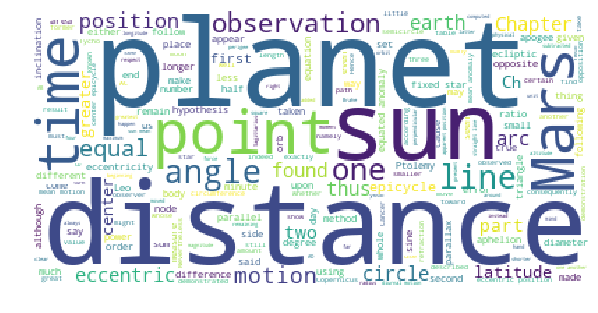

In [173]:
#Word cloud
from os import path  
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
stopwords=set(STOPWORDS)
stop_words=stopwords.union(["Therefore","But" ,"would" ,"but", "also", "let", 'I' , 'And',  'For', 'A' ,'The','will','now'])
wordcloud = WordCloud(background_color="white", max_words=2000,
               stopwords=stop_words, contour_width=3, contour_color='steelblue' )
wc=wordcloud.generate(str1)
print(wc)
fig = plt.figure(figsize=(10,15))
plt.imshow(wc)
plt.axis('off')
plt.show()
fig.savefig("word2.png", dpi=1800)

In [221]:
def chapter_wordcloud(chapter_number):
    df=dfAstroNova[dfAstroNova.chapter==chapter_number]
    texts=[]
    for sen in df.sentences:
        texts +=sen
    stopwords=set(STOPWORDS)
    stop_words=stopwords.union(["Therefore","But" ,"would" ,"but", "also", "let", 'I' , 'And',  'For', 'A' ,'The','will','now'])
    str2 = ''.join(texts)
    wordcloud = WordCloud(background_color="white", max_words=2000,
                   stopwords=stop_words, contour_width=3, contour_color='steelblue' )
    wc=wordcloud.generate(str2)
    print(wc)

    fig = plt.figure(figsize=(10,15))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    fig.savefig("word2.png", dpi=1800)
    return 


# Chapter 4

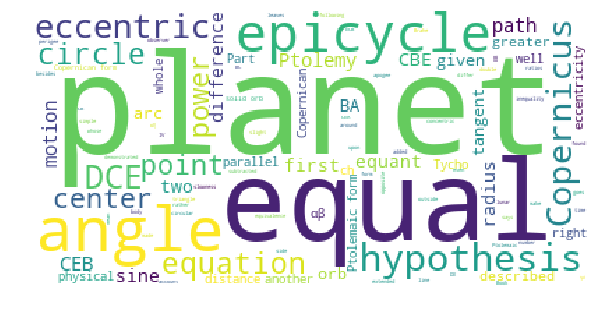

In [226]:
chapter_wordcloud(4)

# Chapter 27

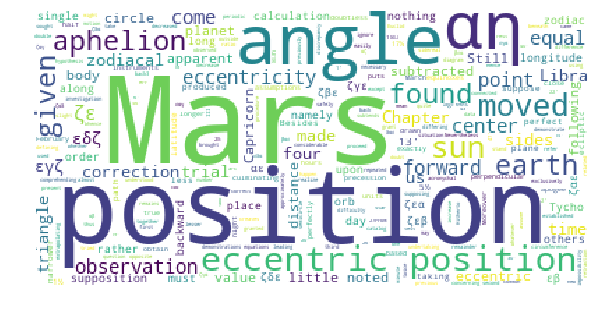

In [222]:
chapter_wordcloud(27)

# Chapter 70

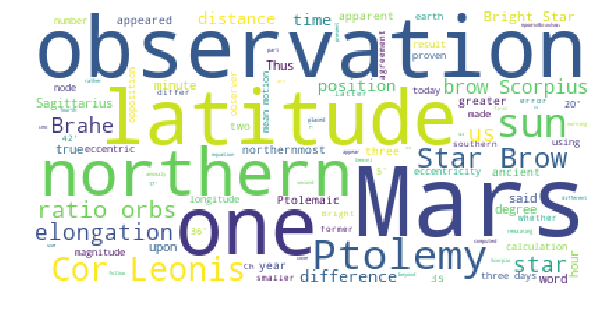

In [223]:
chapter_wordcloud(70)

In [ ]:
NetwrokX